# Power Transformer

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [57]:
df=pd.read_csv('csv/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [58]:
df.shape

(1030, 9)

In [59]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [60]:
x=df.drop(columns=['Strength'])
y=df.Strength

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_pred,y_test)

0.42317047978909705

In [63]:
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,cv=10,scoring='r2'))

np.float64(0.27820729160873753)

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


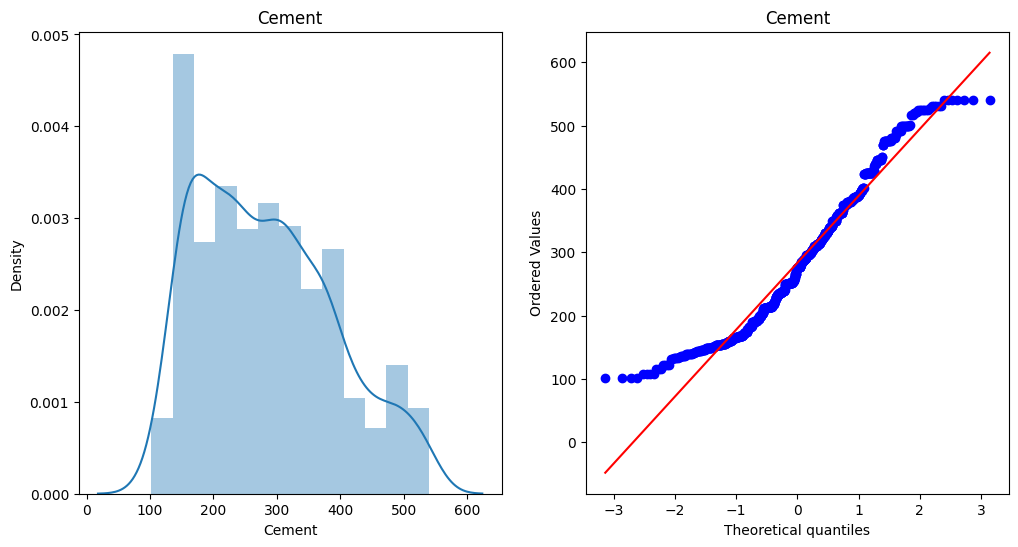

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


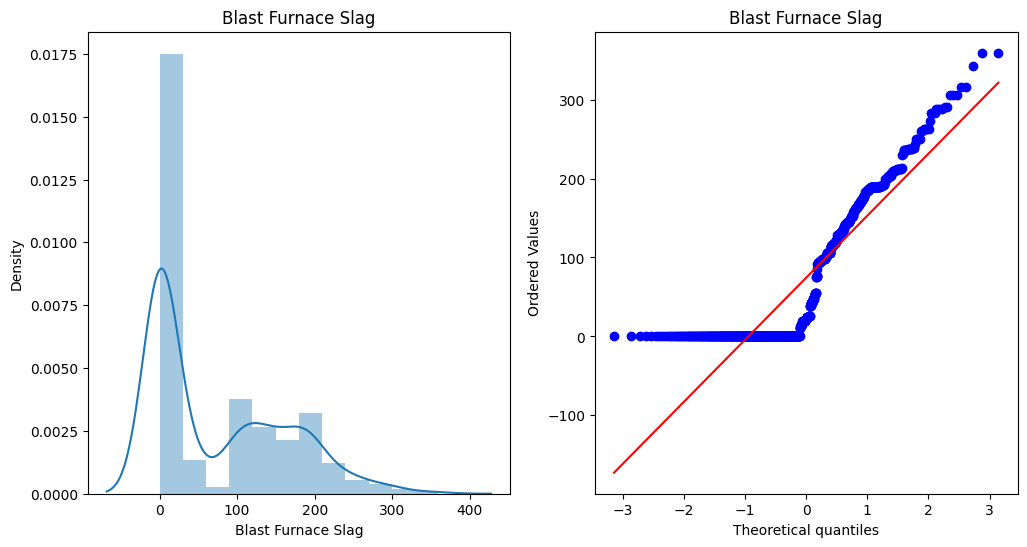

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


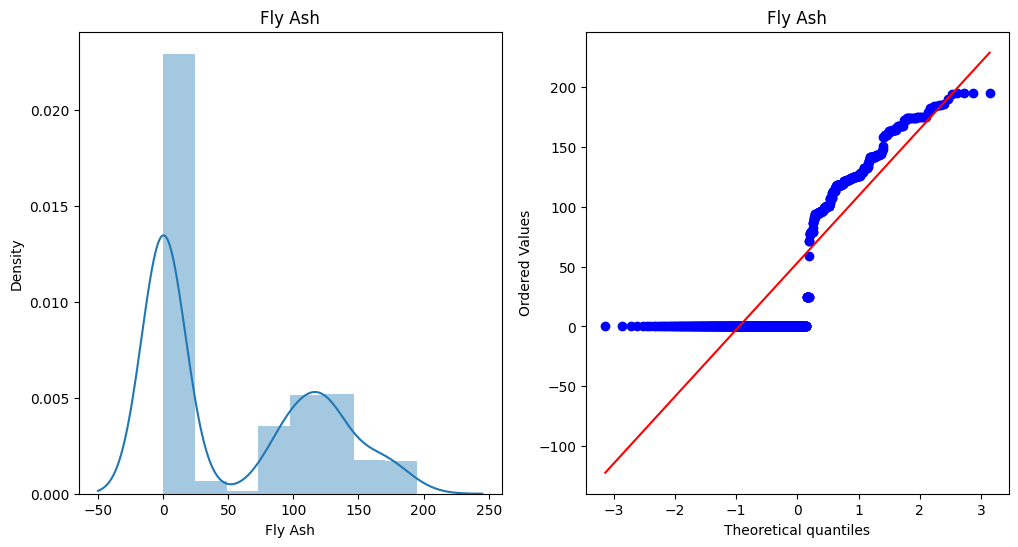

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


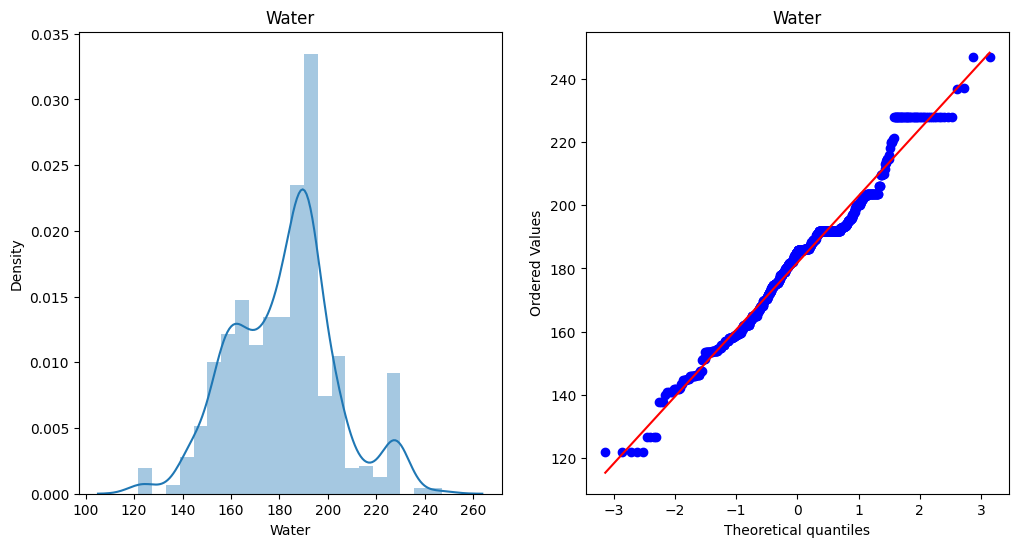

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


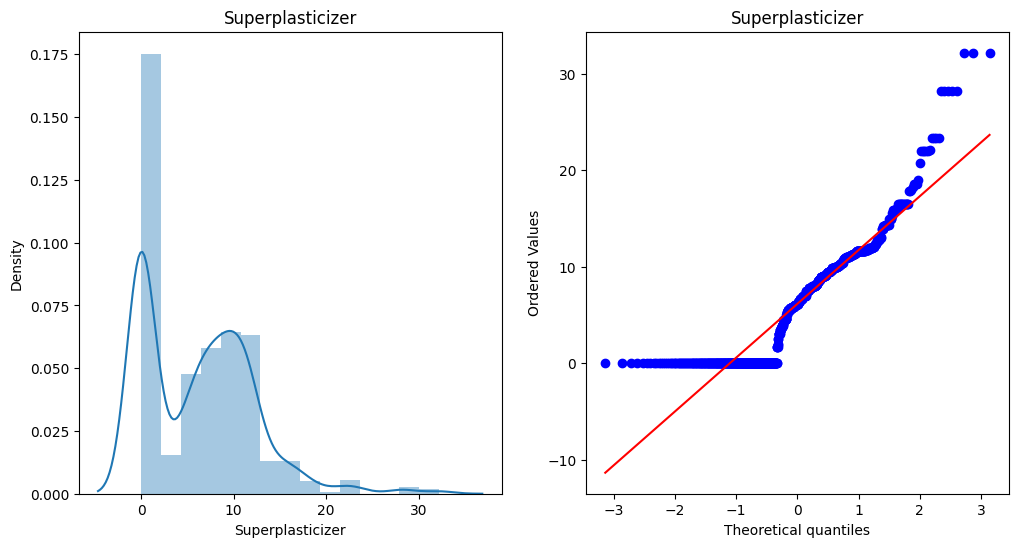

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


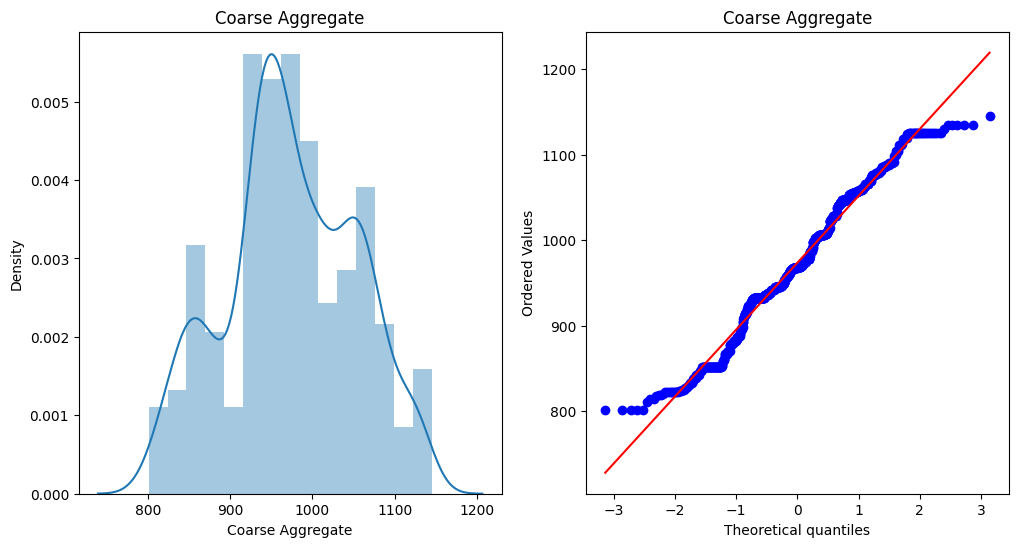

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


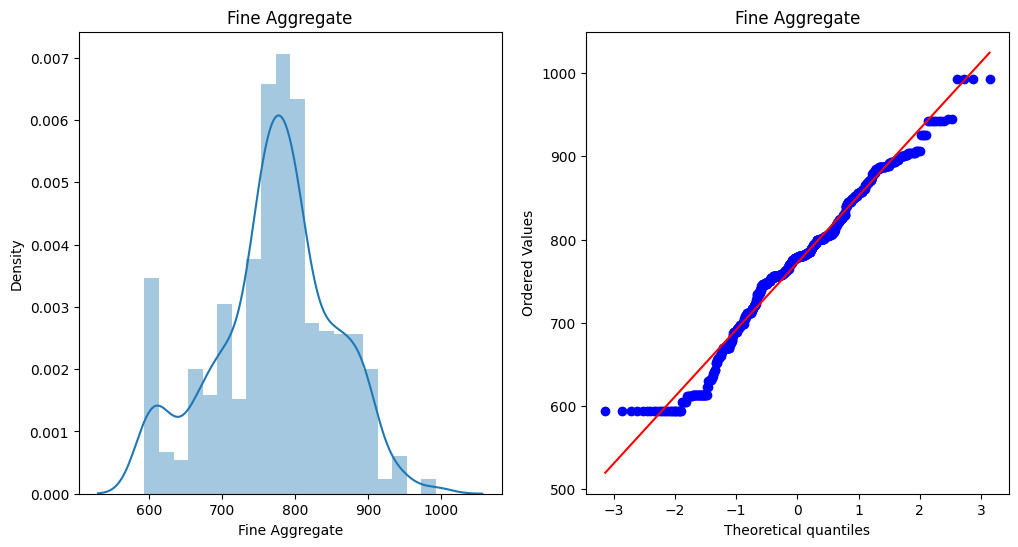

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\4092494239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


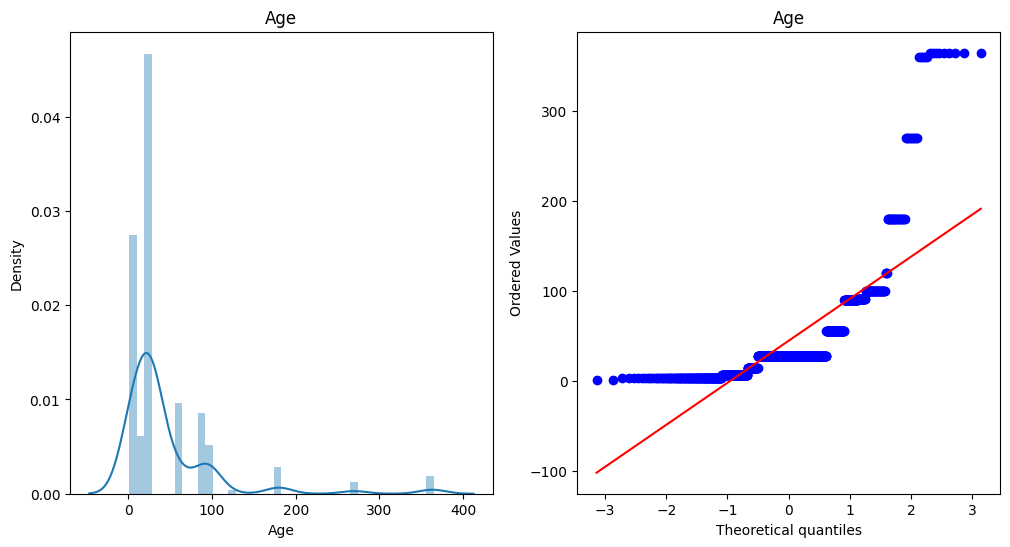

In [64]:
#ploting
for col in x_train.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)

    plt.show()

## Box-Cox Method

In [65]:
pt=PowerTransformer(method='box-cox')
x_train_transformed=pt.fit_transform(x_train+0.0001)
x_test_transformed=pt.fit_transform(x_test+0.0001)
pd.DataFrame({
    'cols': x_train.columns,
    'box-cox-lambdas': pt.lambdas_
})

,cols,box-cox-lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.032321
2,Fly Ash,-0.008968
3,Water,0.959062
4,Superplasticizer,0.140933
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014697


In [66]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred=lr.predict(x_test_transformed)
r2_score(y_pred,y_test)

0.7766813522964836

In [67]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

np.float64(0.6658537935430977)

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


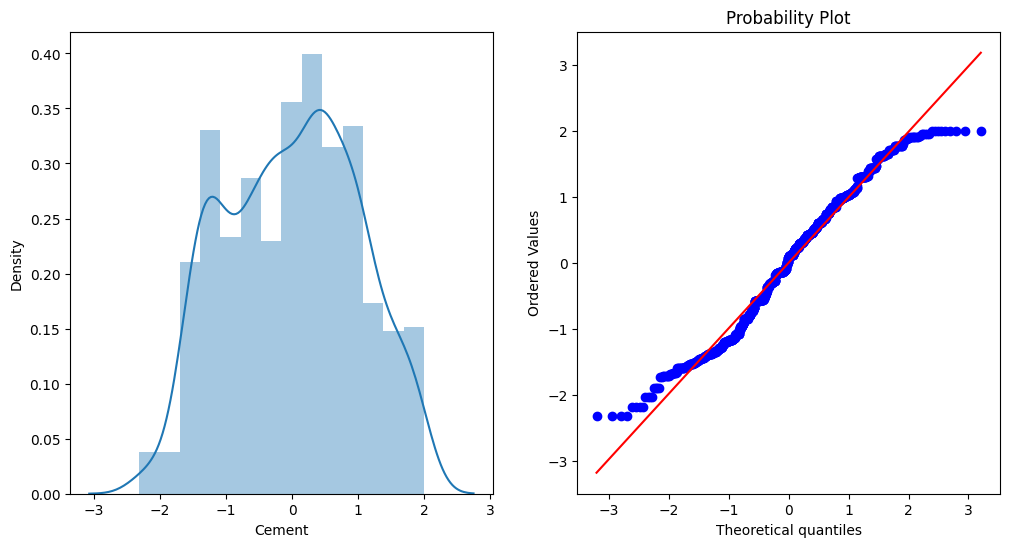

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


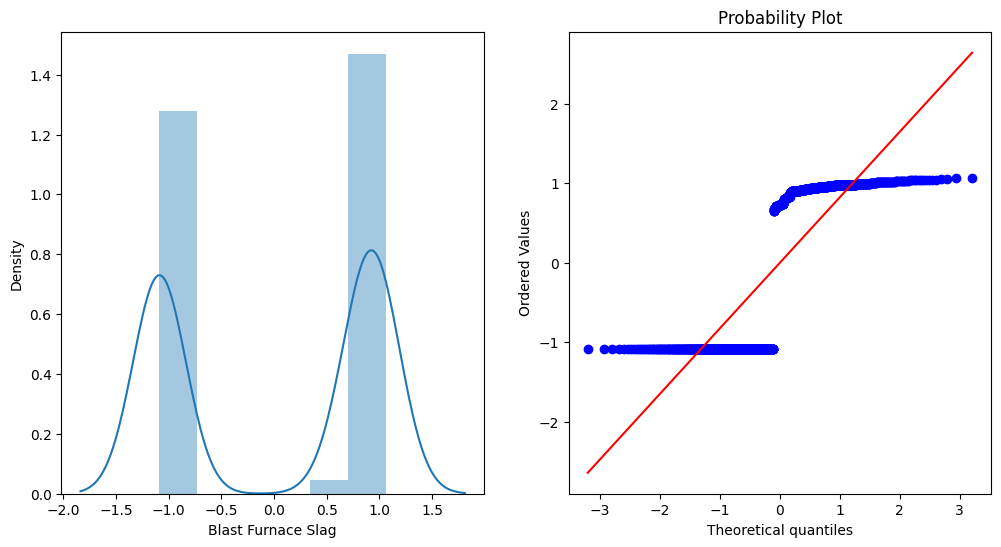

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


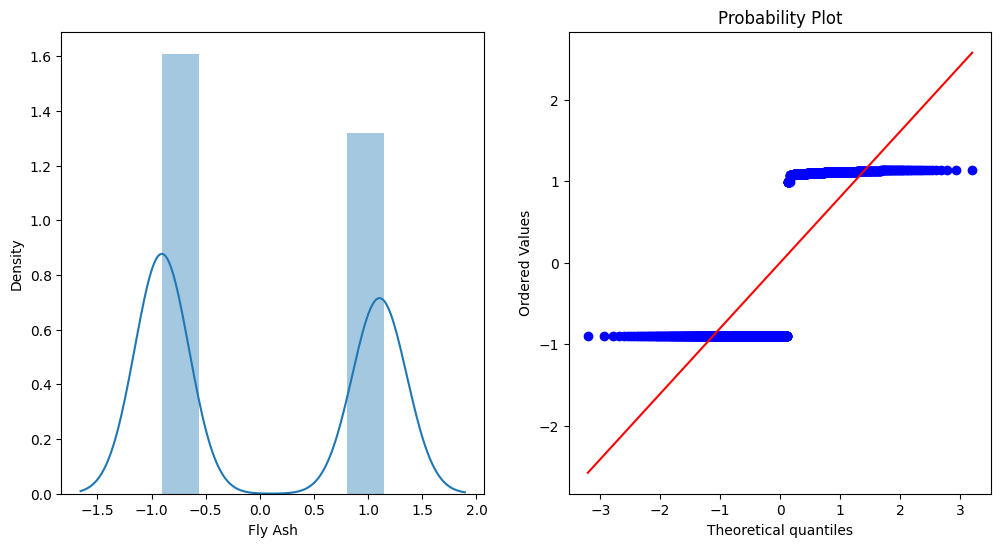

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


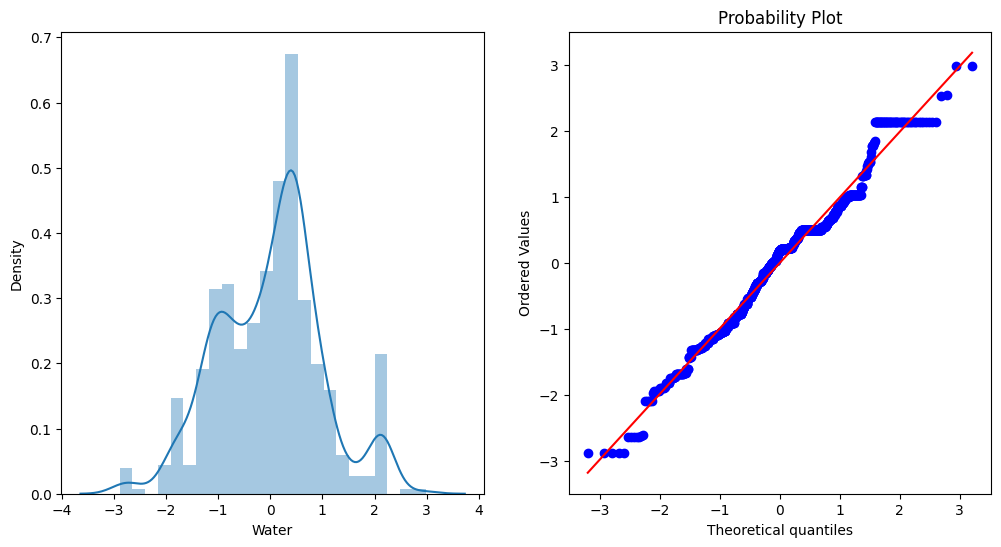

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


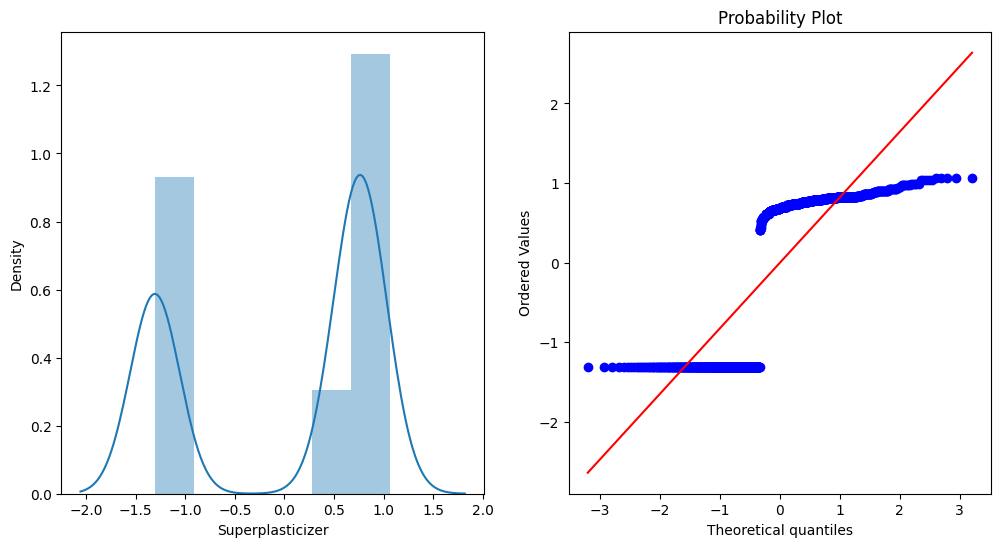

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


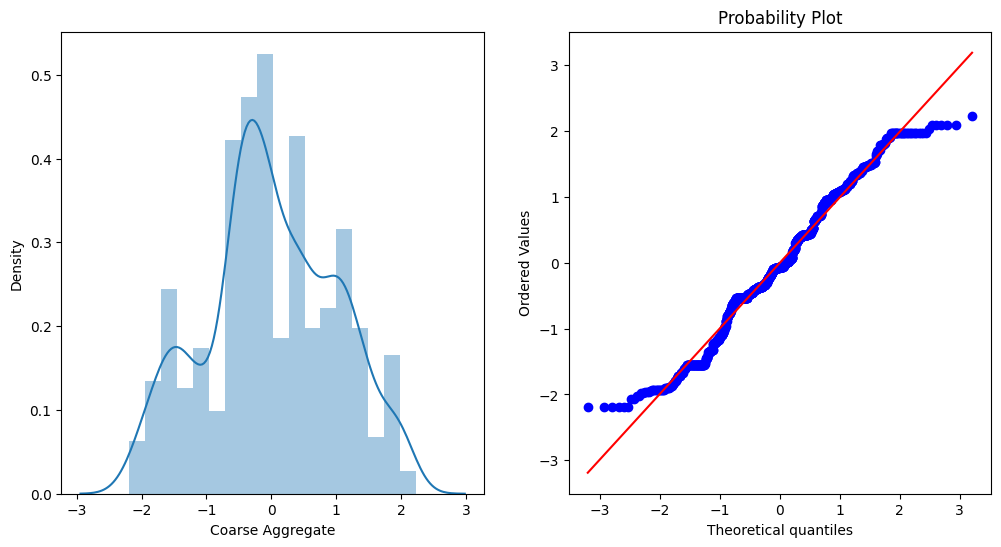

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


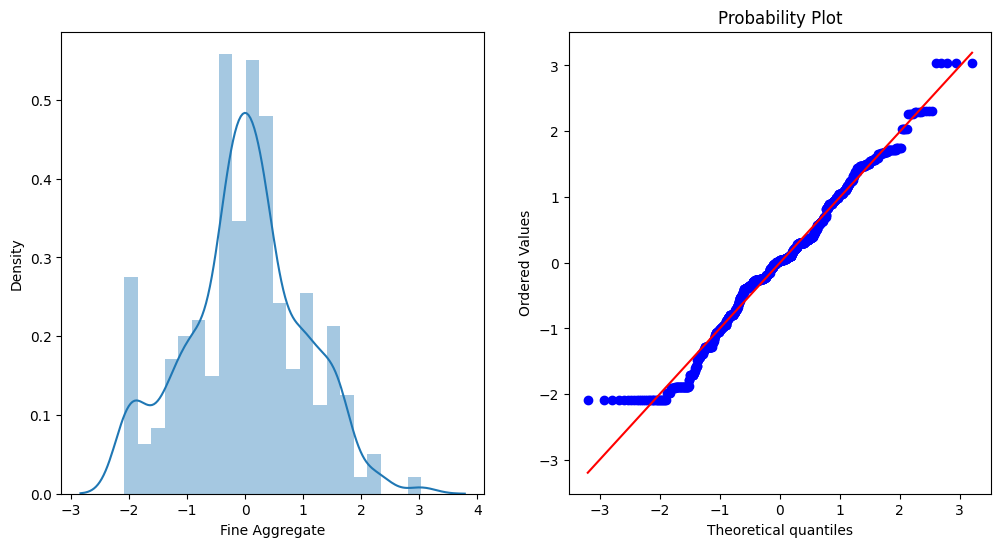

C:\Users\moury\AppData\Local\Temp\ipykernel_7404\3128045120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_transformed[col])


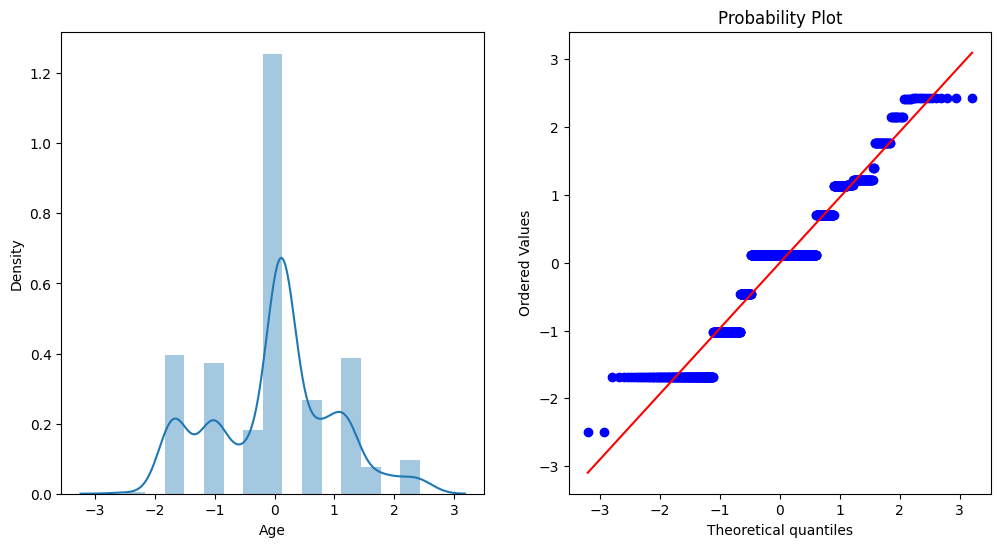

In [68]:
x_transformed=pd.DataFrame(x_transformed,columns=x_train.columns)
for col in x_transformed.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.distplot(x_transformed[col])

    plt.subplot(122)
    stats.probplot(x_transformed[col],dist="norm",plot=plt)

    plt.show()

## Yeo-Johnson Method

In [69]:
pt1=PowerTransformer()
pt1.fit_transform(x)


pd.DataFrame({
    'cols': x_train.columns,
    'yeo-johnson lambdas': pt1.lambdas_,
    'box-cox lambdas': pt.lambdas_
})

,cols,yeo-johnson lambdas,box-cox lambdas
0,Cement,0.169544,0.172271
1,Blast Furnace Slag,0.016633,0.022924
2,Fly Ash,-0.136480,-0.028797
3,Water,0.808438,0.809568
4,Superplasticizer,0.264160,0.087911
5,Coarse Aggregate,1.129395,1.129167
6,Fine Aggregate,1.830763,1.829625
7,Age,0.001771,0.048975
